In [1]:
cd /home/ubuntu/FedEM/

/home/ubuntu/FedEM


In [2]:

from utils.utils import *
from utils.constants import *
from utils.args import *
from run_experiment import * 

from torch.utils.tensorboard import SummaryWriter

# Import General Libraries
import os
import argparse
import torch
import copy
import pickle
import random
import numpy as np
import pandas as pd
from models import *

# Import Transfer Attack
from transfer_attacks.Personalized_NN import *
from transfer_attacks.Params import *
from transfer_attacks.Transferer import *
from transfer_attacks.Args import *
from transfer_attacks.TA_utils import *

import numba 
import matplotlib


Uw 0.3217363549313757
URsv 0.7896584743057772
UGoT 0.7245451643791893


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


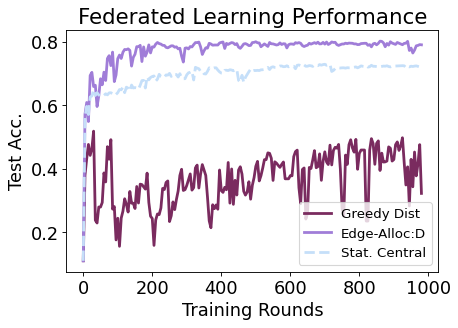

In [6]:
from palettable.cubehelix import Cubehelix
palette = Cubehelix.make(start=1, rotation=-0.5, n=8)
palette.colors
coloridx = [0, 2, 3, 4, 5]

names = ['Uw', 'URsv', 'UGoT']
legend_name = ["Greedy Dist", "Edge-Alloc:D", "Stat. Central"]
colors = [np.divide(palette.colors[2],255), np.divide(palette.colors[4],255), np.divide(palette.colors[6],255)]
linestyles = ['solid','solid','dashed']

plt.figure(figsize=(6, 4), dpi=80)


for itt in range(len(names)):
    with open("weights/DisMEC/23_07_04_DistMEC_SL/" + names[itt] +"/train_log.p", "rb") as file:
        # Load the object from the pickle file
        obj = pickle.load(file)

    # Access the loaded object
    print(names[itt], obj["test_acc"][-1])
    plt.plot(obj["rounds"], obj["test_acc"], label = legend_name[itt], linewidth=2.5, color = colors[itt],
            linestyle = linestyles[itt])
    
# Adding labels and title
#  Set Font Size Limitations
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

# plt.xlabel('Categories')
plt.ylabel('Test Acc.')
plt.xlabel('Training Rounds')
plt.title('Federated Learning Performance')
plt.legend(loc = 'best', prop={'size': 12})


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


Uw 0.3365464411107565
URsv 0.7842323651452282
UGoT 0.6783274816469836


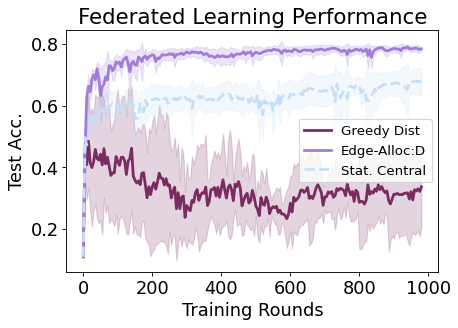

In [6]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

from palettable.cubehelix import Cubehelix
import matplotlib

palette = Cubehelix.make(start=1, rotation=-0.5, n=8)
coloridx = [0, 2, 3, 4, 5]

names = ['Uw', 'URsv', 'UGoT']
legend_name = ["Greedy Dist", "Edge-Alloc:D", "Stat. Central"]
colors = [np.divide(palette.colors[2], 255), np.divide(palette.colors[4], 255), np.divide(palette.colors[6], 255)]
linestyles = ['solid', 'solid', 'dashed']

plt.figure(figsize=(6, 4), dpi=80)

for itt in range(len(names)):
    test_acc_list = []

    for i in range(5):
        with open(f"weights/DisMEC/23_07_02_DistMEC_FL/{names[itt]}/train_log{i}.p", "rb") as file:
            obj = pickle.load(file)

        test_acc_list.append(obj["test_acc"])

    # Calculate mean and standard deviation
    mean_acc = np.mean(test_acc_list, axis=0)
    std_acc = np.std(test_acc_list, axis=0)

    print(names[itt], mean_acc[-1])

    # Plot mean line with shaded standard deviation area
    plt.plot(obj["rounds"], mean_acc, label=legend_name[itt], linewidth=2.5, color=colors[itt], linestyle=linestyles[itt])
    plt.fill_between(obj["rounds"], mean_acc - std_acc, mean_acc + std_acc, alpha=0.2, color=colors[itt])

# Set font size limitations
font = {'family': 'normal',
        'weight': 'normal',
        'size': 16}

matplotlib.rc('font', **font)

plt.ylabel('Test Acc.')
plt.xlabel('Training Rounds')
plt.title('Federated Learning Performance')
plt.legend(loc='best', prop={'size': 12})

plt.show()
